In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Text(0.5, 1.0, 'Distribution of Medical Charges')

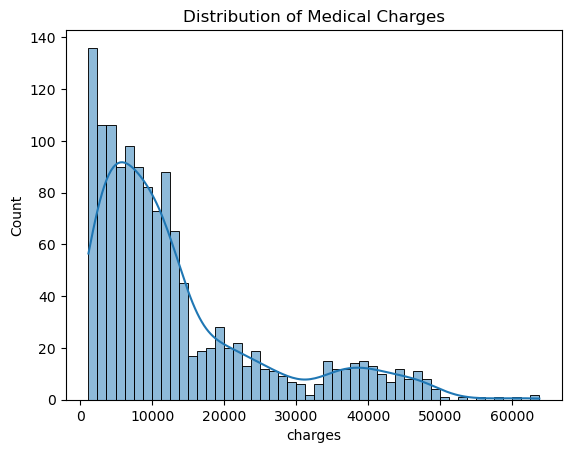

In [7]:
#explotary data analysis(eda)
#target distribution
sns.histplot(df['charges'], bins=50, kde=True)
plt.title('Distribution of Medical Charges')

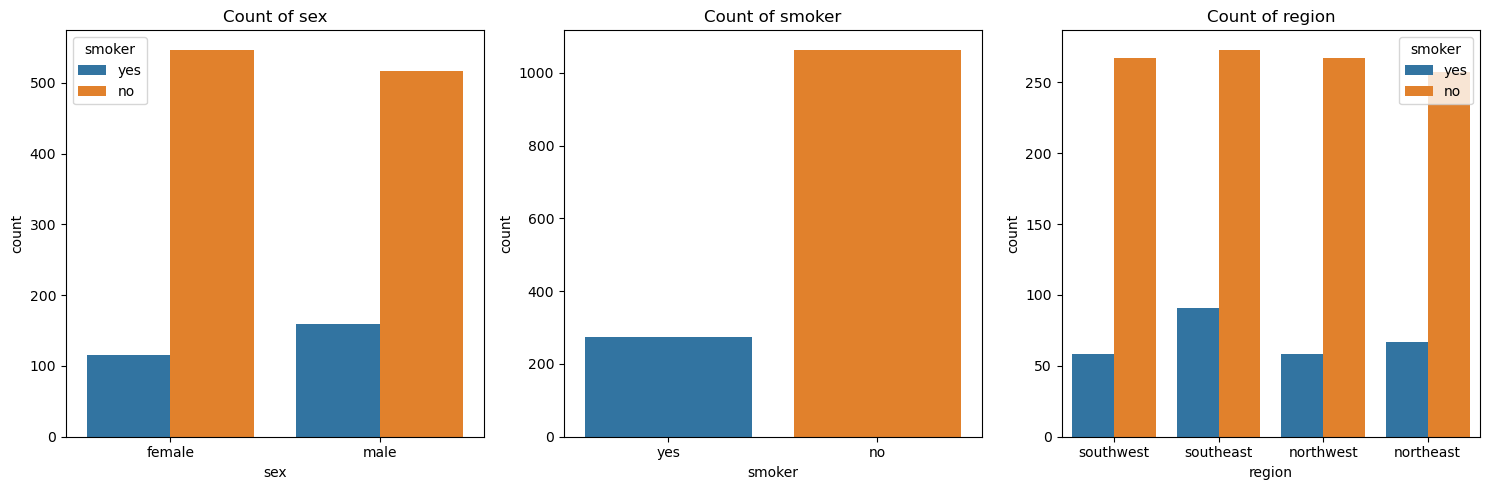

In [8]:
# Categorical feature breakdown with vertical bars arranged vertically
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, col in enumerate(['sex', 'smoker', 'region']):
    sns.countplot(x=col, data=df, ax=axes[i], hue='smoker')
    axes[i].set_title(f"Count of {col}")

plt.tight_layout()
plt.show()

<Axes: xlabel='smoker', ylabel='charges'>

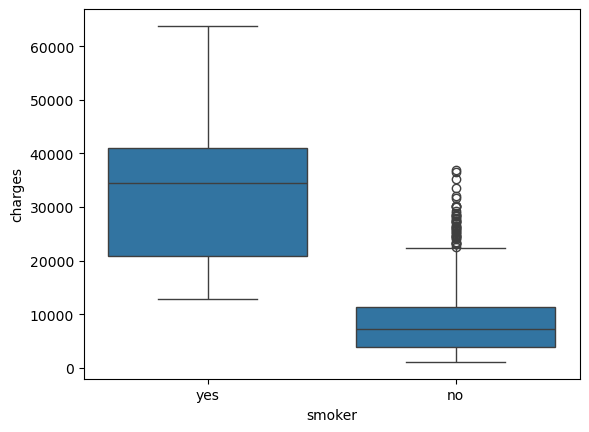

In [9]:
#box-plots : categorical vs charges
sns.boxplot(x='smoker', y='charges', data=df)


<Axes: xlabel='sex', ylabel='charges'>

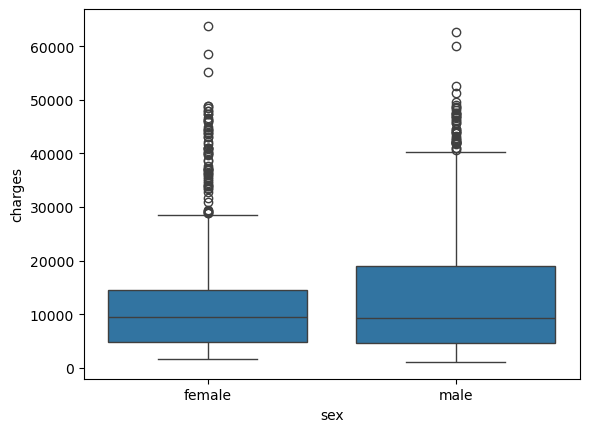

In [10]:
sns.boxplot(x='sex',y='charges',data=df)

<Axes: xlabel='region', ylabel='charges'>

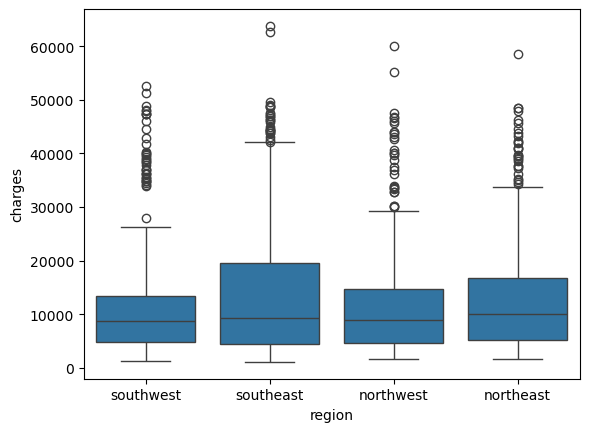

In [11]:
sns.boxplot(x='region',y='charges',data=df)

In [12]:
#feature engineering
#ohe
df_fe = pd.get_dummies(df,drop_first=True)

In [13]:
df_fe

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False,True,False,False
1334,18,31.920,0,2205.98080,False,False,False,False,False
1335,18,36.850,0,1629.83350,False,False,False,True,False
1336,21,25.800,0,2007.94500,False,False,False,False,True


In [14]:
df_fe['bmi_smoker'] = df_fe['bmi'] * df_fe['smoker_yes']
df_fe['age_smoker'] = df_fe['age'] * df_fe['smoker_yes']
df_fe['age_bmi'] = df_fe['age'] * df_fe['bmi']

In [15]:
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,mean_absolute_error,r2_score,mean_squared_error

In [16]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(df_fe.drop('charges', axis=1))

In [17]:
df_fe.head(5)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,bmi_smoker,age_smoker,age_bmi
0,19,27.900,0,16884.92400,False,True,False,False,True,27.9,19,530.100
1,18,33.770,1,1725.55230,True,False,False,True,False,0.0,0,607.860
2,28,33.000,3,4449.46200,True,False,False,True,False,0.0,0,924.000
3,33,22.705,0,21984.47061,True,False,True,False,False,0.0,0,749.265
4,32,28.880,0,3866.85520,True,False,True,False,False,0.0,0,924.160


In [18]:
#features and targets
X= df_fe.drop('charges',axis=1)
y=df_fe['charges']

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
#training the models
#linear regression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

In [21]:
#randomforestregressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)

In [22]:
def evaluate_model(y_true, y_pred, model_name="Model"):
    print(f"{model_name}")
    print("R² Score:", r2_score(y_true, y_pred))
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("-" * 40)

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rfr, "Random Forest")


Linear Regression
R² Score: 0.8655963698748488
MAE: 2760.610774563619
RMSE: 4567.930941336486
----------------------------------------
Random Forest
R² Score: 0.869057464384365
MAE: 2388.3131182047273
RMSE: 4508.731812011411
----------------------------------------


In [23]:
# sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

Text(0.5, 1.0, 'Feature Importances')

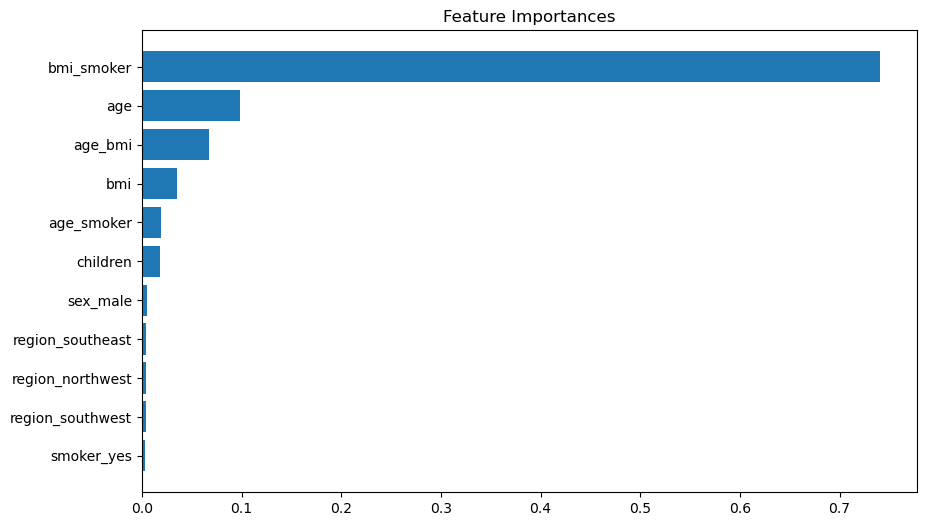

In [24]:
#feature importance and interpretation
importances = rfr.feature_importances_
features = X.columns
sorted_idx = np.argsort(importances)

plt.figure(figsize=(10,6))
plt.barh(range(len(sorted_idx)), importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), features[sorted_idx])
plt.title('Feature Importances')


In [25]:
!pip install shap

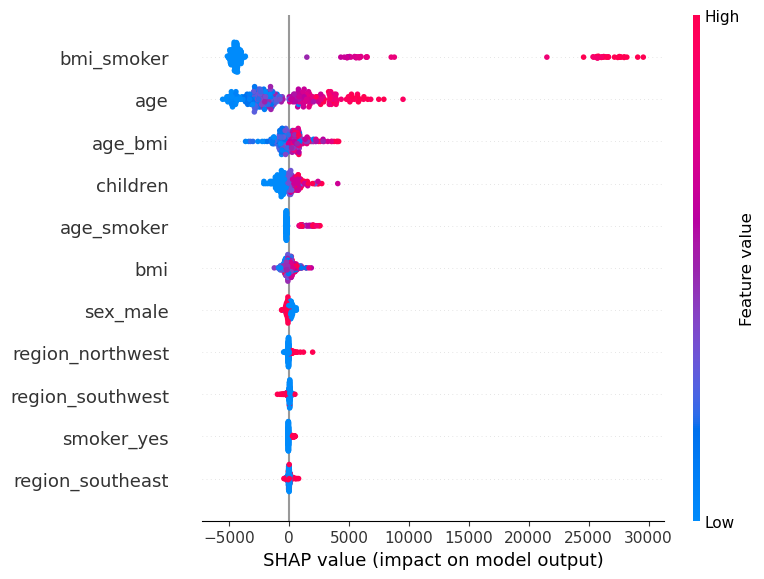

In [26]:
import shap
explainer = shap.TreeExplainer(rfr)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

In [27]:
# Fairness audit
X_test_copy = X_test.copy()
X_test_copy['actual'] = y_test
X_test_copy['pred_rf'] = y_pred_rfr
X_test_copy['sex'] = df.loc[X_test.index, 'sex']

grouped_sex = X_test_copy.groupby('sex')[['actual', 'pred_rf']].mean()
grouped_sex['error'] = abs(grouped_sex['actual'] - grouped_sex['pred_rf'])
grouped_sex

,actual,pred_rf,error
sex,,,
female,12281.345972,12413.645744,132.299772
male,13719.691693,14251.154557,531.462864


In [28]:
# groupwise evaluation region
X_test_copy['region'] = df.loc[X_test.index, 'region']
grouped_region = X_test_copy.groupby('region')[['actual', 'pred_rf']].mean()
grouped_region['error'] = abs(grouped_region['actual'] - grouped_region['pred_rf'])
grouped_region

,actual,pred_rf,error
region,,,
northeast,13750.091863,13316.199686,433.892177
northwest,11657.222458,11780.694626,123.472169
southeast,14865.271559,15687.724551,822.452992
southwest,11201.940833,11794.445699,592.504865


Text(0.5, 1.0, 'Residuals vs True Charges')

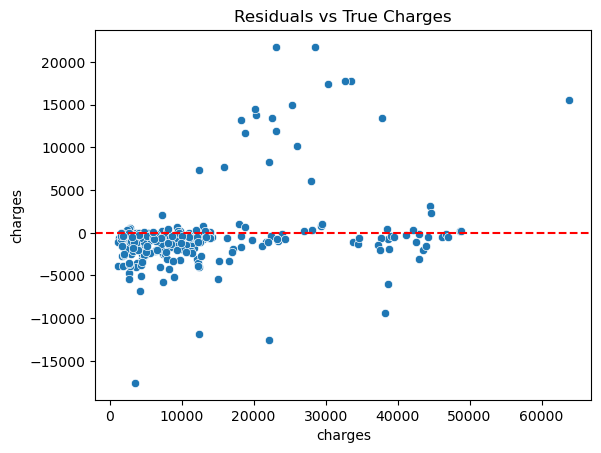

In [29]:
#residuals and visualization
residuals = y_test - y_pred_rfr
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs True Charges')

In [30]:
#hyperparameter tuning with grid search cv
from sklearn.model_selection import GridSearchCV

In [37]:
rfr =RandomForestRegressor(random_state=42)
params = {"n_estimators":[100,200],
          "max_depth":[None,5,10],
          "min_samples_split":[2,5]
         }
grid = GridSearchCV(rfr,params,cv=5, scoring = "neg_mean_absolute_error",n_jobs = -1)
grid.fit(X_train,y_train)
print("Best params:",grid.best_params_)

grid.predict(X_test)
print("mean absolute error (MAE):",mean_absolute_error(y_test,y_pred_rfr))

Best params: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}
mean absolute error (MAE): 2388.3131182047273


In [39]:
import joblib
joblib.dump(grid.best_estimator_,"rfr_model.pkl")

['rfr_model.pkl']

In [47]:
#Fairness matrics
def disparate_impact_ratio(df, group_col, y_true, y_pred):
    df = df.copy()
    df["error"] = abs(y_true - y_pred)
    groups = df[group_col].unique()

    group1 = df[df[group_col] == groups[0]]
    group2 = df[df[group_col] == groups[1]]

    dir_ratio = group2["error"].mean() / group1["error"].mean()
    return dir_ratio

# Example: fairness by sex
X_test_copy = X_test.copy()
X_test_copy["sex"] = df.loc[X_test.index, "sex"]
X_test_copy["charges"] = y_test
X_test_copy["pred"] = y_pred_rfr

print("DIR (Sex):", disparate_impact_ratio(X_test_copy, "sex", y_test, y_pred_rfr))


DIR (Sex): 1.0963791309158992


In [53]:
from sklearn.metrics import mean_absolute_error

group_mae = X_test_copy.groupby("sex").apply(lambda g: mean_absolute_error(g["charges"], g["pred"]))
print("Group-wise MAE by sex:\n", group_mae)


Group-wise MAE by sex:
 sex
female    2283.212675
male      2503.266728
dtype: float64
